In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from tqdm import tqdm

%matplotlib inline

In [2]:
et = pd.read_csv("email_table.csv") 

In [3]:
et.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [4]:
# number of unique emails in email_table.csv

et_set = set(et["email_id"].unique())
print("the number of unique emails in email_table.csv data",len(et["email_id"].unique()))

the number of unique emails in email_table.csv data 100000


In [5]:
eot = pd.read_csv("email_opened_table.csv")
eot.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [6]:
# number of unique emails in email_opened_table.csv

eot_set = set(eot["email_id"].unique())
print("the number of unique emails in email_opened_table.csv data",len(eot["email_id"].unique()))

the number of unique emails in email_opened_table.csv data 10345


In [7]:
lct = pd.read_csv("link_clicked_table.csv")
lct.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [8]:
# number of unique emails in link_clicked_table.csv

lct_set = set(lct["email_id"].unique())
print("the number of unique emails in link_clicked_table.csv data",len(lct["email_id"].unique()))

the number of unique emails in link_clicked_table.csv data 2119


In [9]:
lct_set <= et_set

True

In [10]:
eot_set <= et_set

True

In [11]:
# merging the datasets

eot['opened'] = 1
lct['clicked'] = 1
df = pd.merge(left = et, right = eot, how = 'left', on = 'email_id')
df = pd.merge(left = df, right = lct, how = 'left', on = 'email_id')
df = df.fillna(value=0)
df['opened'] = df['opened'].astype(int)
df['clicked'] = df['clicked'].astype(int)

df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


In [12]:
y = df["clicked"].values
df = df.drop(columns = ["clicked"])
x = df.values

In [13]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.2, random_state = 0)

In [14]:
df_train = pd.DataFrame(x_train)
df_train.columns = ["email_id","email_text","email_version","hour","weekday","user_country","user_past_purchases","opened"]
df_train["clicked"] = y_train

df_cv = pd.DataFrame(x_cv)
df_cv.columns = ["email_id","email_text","email_version","hour","weekday","user_country","user_past_purchases","opened"]
df_cv["clicked"] = y_cv

df_test = pd.DataFrame(x_test)
df_test.columns = ["email_id","email_text","email_version","hour","weekday","user_country","user_past_purchases","opened"]
df_test["clicked"] = y_test

print("shape of traning data",df_train.shape)
print("shape of cross validation data",df_cv.shape)
print("shape of test data",df_test.shape)

shape of traning data (64000, 9)
shape of cross validation data (16000, 9)
shape of test data (20000, 9)


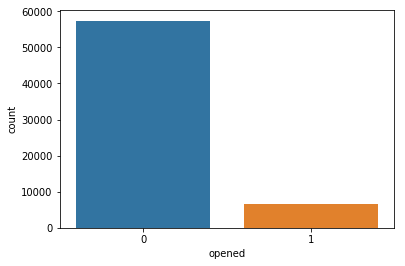

In [15]:
# analyzing opened feature

sns.countplot(x = "opened", data = df_train)

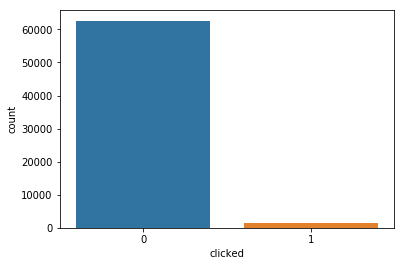

In [16]:
# analyzing clicked feature

sns.countplot(x = "clicked", data = df_train)

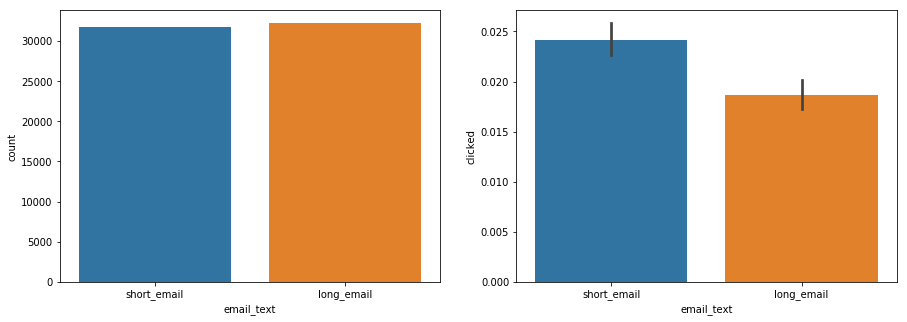

In [17]:
# analyzing email_text feature

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x = "email_text", data = df_train)
plt.subplot(1,2,2)
sns.barplot(x = 'email_text', y = 'clicked', data = df_train)

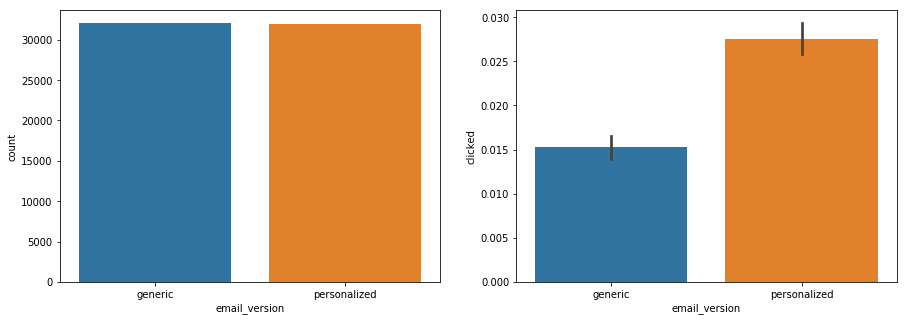

In [18]:
# analyzing email_version feature

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x = "email_version", data = df_train)
plt.subplot(1,2,2)
sns.barplot(x = 'email_version', y = 'clicked', data = df_train)

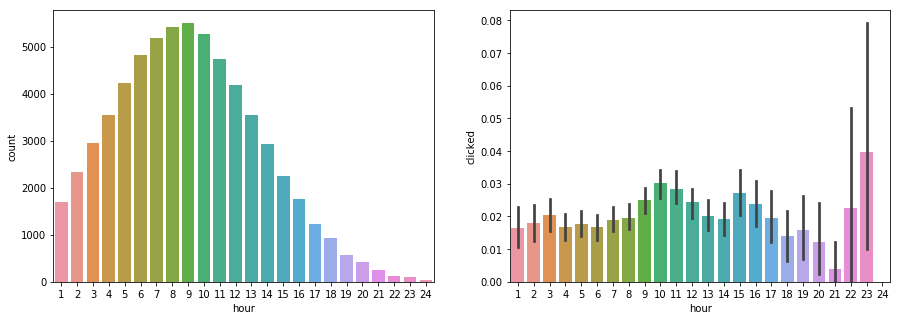

In [19]:
# analyzing hour feature

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x = "hour", data = df_train)
plt.subplot(1,2,2)
sns.barplot(x = 'hour', y = 'clicked', data = df_train)

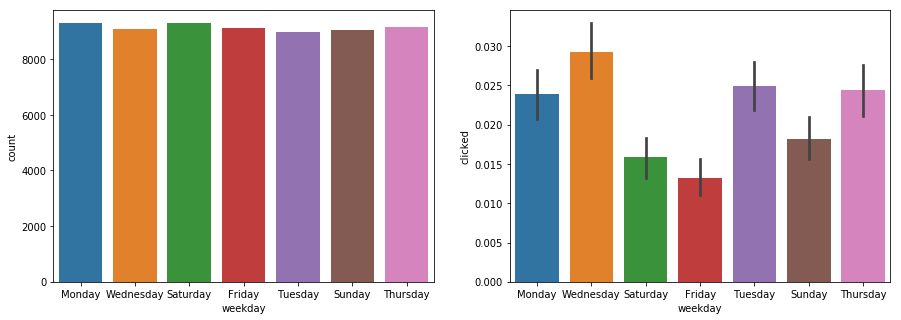

In [20]:
# analyzing weekday feature

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x = "weekday", data = df_train)
plt.subplot(1,2,2)
sns.barplot(x = 'weekday', y = 'clicked', data = df_train)

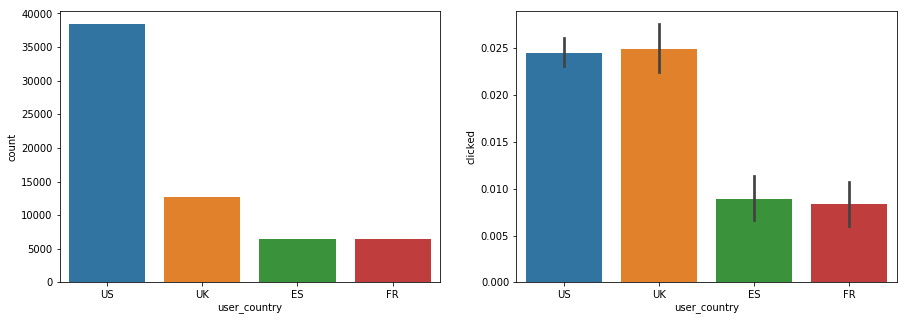

In [21]:
# analyzing user_country feature

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x = "user_country", data = df_train)
plt.subplot(1,2,2)
sns.barplot(x = 'user_country', y = 'clicked', data = df_train)

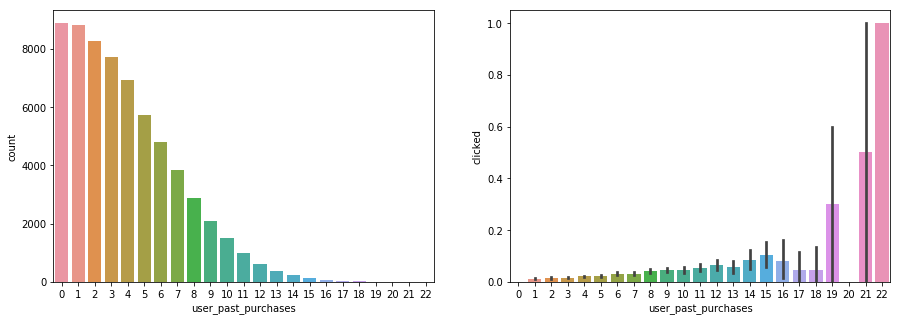

In [22]:
# analyzing user_past_purchases feature

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x = "user_past_purchases", data = df_train)
plt.subplot(1,2,2)
sns.barplot(x = 'user_past_purchases', y = 'clicked', data = df_train)

In [23]:
df_train = df_train.drop(columns = ["opened"])
df_cv = df_cv.drop(columns = ["opened"])
df_test = df_test.drop(columns = ["opened"])

In [24]:
# response coding of hour feature

hour_list_train = df_train["hour"].unique()
hour_list_cv = df_cv["hour"].unique()
hour_list_test = df_test["hour"].unique()

hour_arr_train =[]
hour_arr_cv =[]
hour_arr_test =[]

for i in hour_list_train:
    arr = np.zeros(2)
    arr[0] = df_train[(df_train.hour == i) & (df_train.clicked == 0)].shape[0]/df_train[(df_train.hour == i)].shape[0]
    arr[1] = df_train[(df_train.hour == i) & (df_train.clicked == 1)].shape[0]/df_train[(df_train.hour == i)].shape[0]
    hour_arr_train.append(arr)
    
for i in hour_list_cv:
    arr = np.zeros(2)
    arr[0] = df_cv[(df_cv.hour == i) & (df_cv.clicked == 0)].shape[0]/df_cv[(df_cv.hour == i)].shape[0]
    arr[1] = df_cv[(df_cv.hour == i) & (df_cv.clicked == 1)].shape[0]/df_cv[(df_cv.hour == i)].shape[0]
    hour_arr_cv.append(arr)
    
for i in hour_list_test:
    arr = np.zeros(2)
    arr[0] = df_test[(df_test.hour == i) & (df_test.clicked == 0)].shape[0]/df_test[(df_test.hour == i)].shape[0]
    arr[1] = df_test[(df_test.hour == i) & (df_test.clicked == 1)].shape[0]/df_test[(df_test.hour == i)].shape[0]
    hour_arr_test.append(arr)    

In [25]:
# response coding of weekday feature

weekday_list_train = df_train["weekday"].unique()
weekday_list_cv = df_cv["weekday"].unique()
weekday_list_test = df_test["weekday"].unique()

weekday_arr_train =[]
weekday_arr_cv =[]
weekday_arr_test =[]

for i in weekday_list_train:
    arr = np.zeros(2)
    arr[0] = df_train[(df_train.weekday == i) & (df_train.clicked == 0)].shape[0]/df_train[(df_train.weekday == i)].shape[0]
    arr[1] = df_train[(df_train.weekday == i) & (df_train.clicked == 1)].shape[0]/df_train[(df_train.weekday == i)].shape[0]
    weekday_arr_train.append(arr)
    
for i in weekday_list_cv:
    arr = np.zeros(2)
    arr[0] = df_cv[(df_cv.weekday == i) & (df_cv.clicked == 0)].shape[0]/df_cv[(df_cv.weekday == i)].shape[0]
    arr[1] = df_cv[(df_cv.weekday == i) & (df_cv.clicked == 1)].shape[0]/df_cv[(df_cv.weekday == i)].shape[0]
    weekday_arr_cv.append(arr)
    
for i in weekday_list_test:
    arr = np.zeros(2)
    arr[0] = df_test[(df_test.weekday == i) & (df_test.clicked == 0)].shape[0]/df_test[(df_test.weekday == i)].shape[0]
    arr[1] = df_test[(df_test.weekday == i) & (df_test.clicked == 1)].shape[0]/df_test[(df_test.weekday == i)].shape[0]
    weekday_arr_test.append(arr)   

In [26]:
# response coding of user_country feature

user_country_list_train = df_train["user_country"].unique()
user_country_list_cv = df_cv["user_country"].unique()
user_country_list_test = df_test["user_country"].unique()

user_country_arr_train =[]
user_country_arr_cv =[]
user_country_arr_test =[]

for i in user_country_list_train:
    arr = np.zeros(2)
    arr[0] = df_train[(df_train.user_country == i) & (df_train.clicked == 0)].shape[0]/df_train[(df_train.user_country == i)].shape[0]
    arr[1] = df_train[(df_train.user_country == i) & (df_train.clicked == 1)].shape[0]/df_train[(df_train.user_country == i)].shape[0]
    user_country_arr_train.append(arr)
    
for i in user_country_list_cv:
    arr = np.zeros(2)
    arr[0] = df_cv[(df_cv.user_country == i) & (df_cv.clicked == 0)].shape[0]/df_cv[(df_cv.user_country == i)].shape[0]
    arr[1] = df_cv[(df_cv.user_country == i) & (df_cv.clicked == 1)].shape[0]/df_cv[(df_cv.user_country == i)].shape[0]
    user_country_arr_cv.append(arr)
    
for i in user_country_list_test:
    arr = np.zeros(2)
    arr[0] = df_test[(df_test.user_country == i) & (df_test.clicked == 0)].shape[0]/df_test[(df_test.user_country == i)].shape[0]
    arr[1] = df_test[(df_test.user_country == i) & (df_test.clicked == 1)].shape[0]/df_test[(df_test.user_country == i)].shape[0]
    user_country_arr_test.append(arr)   

In [27]:
# response coding of user_past_purchases feature

user_past_purchases_list_train = df_train["user_past_purchases"].unique()
user_past_purchases_list_cv = df_cv["user_past_purchases"].unique()
user_past_purchases_list_test = df_test["user_past_purchases"].unique()

user_past_purchases_arr_train =[]
user_past_purchases_arr_cv =[]
user_past_purchases_arr_test =[]

for i in user_past_purchases_list_train:
    arr = np.zeros(2)
    arr[0] = df_train[(df_train.user_past_purchases == i) & (df_train.clicked == 0)].shape[0]/df_train[(df_train.user_past_purchases == i)].shape[0]
    arr[1] = df_train[(df_train.user_past_purchases == i) & (df_train.clicked == 1)].shape[0]/df_train[(df_train.user_past_purchases == i)].shape[0]
    user_past_purchases_arr_train.append(arr)
    
for i in user_past_purchases_list_cv:
    arr = np.zeros(2)
    arr[0] = df_cv[(df_cv.user_past_purchases == i) & (df_cv.clicked == 0)].shape[0]/df_cv[(df_cv.user_past_purchases == i)].shape[0]
    arr[1] = df_cv[(df_cv.user_past_purchases == i) & (df_cv.clicked == 1)].shape[0]/df_cv[(df_cv.user_past_purchases == i)].shape[0]
    user_past_purchases_arr_cv.append(arr)
    
for i in user_past_purchases_list_test:
    arr = np.zeros(2)
    arr[0] = df_test[(df_test.user_past_purchases == i) & (df_test.clicked == 0)].shape[0]/df_test[(df_test.user_past_purchases == i)].shape[0]
    arr[1] = df_test[(df_test.user_past_purchases == i) & (df_test.clicked == 1)].shape[0]/df_test[(df_test.user_past_purchases == i)].shape[0]
    user_past_purchases_arr_test.append(arr)   

In [28]:
# encoding of email_text and email_version feature

df_train["is_short_email"] = 0
df_train["is_personalized"] = 0

df_train.is_short_email[(df_train.email_text == "short_email")] = 1
df_train.is_short_email[(df_train.email_text == "long_email")] = 0

df_train.is_personalized[(df_train.email_version == "personalized")] = 1
df_train.is_personalized[(df_train.email_version == "generic")] = 0

df_cv["is_short_email"] = 0
df_cv["is_personalized"] = 0

df_cv.is_short_email[(df_cv.email_text == "short_email")] = 1
df_cv.is_short_email[(df_cv.email_text == "long_email")] = 0

df_cv.is_personalized[(df_cv.email_version == "personalized")] = 1
df_cv.is_personalized[(df_cv.email_version == "generic")] = 0

df_test["is_short_email"] = 0
df_test["is_personalized"] = 0

df_test.is_short_email[(df_test.email_text == "short_email")] = 1
df_test.is_short_email[(df_test.email_text == "long_email")] = 0

df_test.is_personalized[(df_test.email_version == "personalized")] = 1
df_test.is_personalized[(df_test.email_version == "generic")] = 0

In [29]:
# adding response encoded features of hour to the datasets

df_train["hour_not_clicked"] = 0
df_train["hour_clicked"] = 0

for i in hour_list_train:
    df_train.hour_not_clicked[(df_train.hour == i)] = hour_arr_train[list(hour_list_train).index(i)][0]
    df_train.hour_clicked[(df_train.hour == i)] = hour_arr_train[list(hour_list_train).index(i)][1]
    
df_cv["hour_not_clicked"] = 0
df_cv["hour_clicked"] = 0

for i in hour_list_cv:
    df_cv.hour_not_clicked[(df_cv.hour == i)] = hour_arr_cv[list(hour_list_cv).index(i)][0]
    df_cv.hour_clicked[(df_cv.hour == i)] = hour_arr_cv[list(hour_list_cv).index(i)][1]
    
df_test["hour_not_clicked"] = 0
df_test["hour_clicked"] = 0

for i in hour_list_test:
    df_test.hour_not_clicked[(df_test.hour == i)] = hour_arr_test[list(hour_list_test).index(i)][0]
    df_test.hour_clicked[(df_test.hour == i)] = hour_arr_test[list(hour_list_test).index(i)][1]    

In [30]:
# adding response encoded features of weekday to the datasets

df_train["weekday_not_clicked"] = 0
df_train["weekday_clicked"] = 0

for i in weekday_list_train:
    df_train.weekday_not_clicked[(df_train.weekday == i)] = weekday_arr_train[list(weekday_list_train).index(i)][0]
    df_train.weekday_clicked[(df_train.weekday == i)] = weekday_arr_train[list(weekday_list_train).index(i)][1]
    
df_cv["weekday_not_clicked"] = 0
df_cv["weekday_clicked"] = 0

for i in weekday_list_cv:
    df_cv.weekday_not_clicked[(df_cv.weekday == i)] = weekday_arr_cv[list(weekday_list_cv).index(i)][0]
    df_cv.weekday_clicked[(df_cv.weekday == i)] = weekday_arr_cv[list(weekday_list_cv).index(i)][1]
    
df_test["weekday_not_clicked"] = 0
df_test["weekday_clicked"] = 0

for i in weekday_list_test:
    df_test.weekday_not_clicked[(df_test.weekday == i)] = weekday_arr_test[list(weekday_list_test).index(i)][0]
    df_test.weekday_clicked[(df_test.weekday == i)] = weekday_arr_test[list(weekday_list_test).index(i)][1] 

In [31]:
# adding response encoded features of user_country to the datasets

df_train["user_country_not_clicked"] = 0
df_train["user_country_clicked"] = 0

for i in user_country_list_train:
    df_train.user_country_not_clicked[(df_train.user_country == i)] = user_country_arr_train[list(user_country_list_train).index(i)][0]
    df_train.user_country_clicked[(df_train.user_country == i)] = user_country_arr_train[list(user_country_list_train).index(i)][1]
    
df_cv["user_country_not_clicked"] = 0
df_cv["user_country_clicked"] = 0

for i in user_country_list_cv:
    df_cv.user_country_not_clicked[(df_cv.user_country == i)] = user_country_arr_cv[list(user_country_list_cv).index(i)][0]
    df_cv.user_country_clicked[(df_cv.user_country == i)] = user_country_arr_cv[list(user_country_list_cv).index(i)][1]
    
df_test["user_country_not_clicked"] = 0
df_test["user_country_clicked"] = 0

for i in user_country_list_test:
    df_test.user_country_not_clicked[(df_test.user_country == i)] = user_country_arr_test[list(user_country_list_test).index(i)][0]
    df_test.user_country_clicked[(df_test.user_country == i)] = user_country_arr_test[list(user_country_list_test).index(i)][1] 

In [32]:
# adding response encoded features of user_past_purchases to the datasets

df_train["user_past_purchases_not_clicked"] = 0
df_train["user_past_purchases_clicked"] = 0

for i in user_past_purchases_list_train:
    df_train.user_past_purchases_not_clicked[(df_train.user_past_purchases == i)] = user_past_purchases_arr_train[list(user_past_purchases_list_train).index(i)][0]
    df_train.user_past_purchases_clicked[(df_train.user_past_purchases == i)] = user_past_purchases_arr_train[list(user_past_purchases_list_train).index(i)][1]
    
df_cv["user_past_purchases_not_clicked"] = 0
df_cv["user_past_purchases_clicked"] = 0

for i in user_past_purchases_list_cv:
    df_cv.user_past_purchases_not_clicked[(df_cv.user_past_purchases == i)] = user_past_purchases_arr_cv[list(user_past_purchases_list_cv).index(i)][0]
    df_cv.user_past_purchases_clicked[(df_cv.user_past_purchases == i)] = user_past_purchases_arr_cv[list(user_past_purchases_list_cv).index(i)][1]
    
df_test["user_past_purchases_not_clicked"] = 0
df_test["user_past_purchases_clicked"] = 0

for i in user_past_purchases_list_test:
    df_test.user_past_purchases_not_clicked[(df_test.user_past_purchases == i)] = user_past_purchases_arr_test[list(user_past_purchases_list_test).index(i)][0]
    df_test.user_past_purchases_clicked[(df_test.user_past_purchases == i)] = user_past_purchases_arr_test[list(user_past_purchases_list_test).index(i)][1] 

In [33]:
df_train = df_train.drop(columns = ["email_id","email_text","email_version","hour","weekday","user_country","user_past_purchases"])
df_cv = df_cv.drop(columns = ["email_id","email_text","email_version","hour","weekday","user_country","user_past_purchases"])
df_test = df_test.drop(columns = ["email_id","email_text","email_version","hour","weekday","user_country","user_past_purchases"])
df_train.head()

,clicked,is_short_email,is_personalized,hour_not_clicked,hour_clicked,weekday_not_clicked,weekday_clicked,user_country_not_clicked,user_country_clicked,user_past_purchases_not_clicked,user_past_purchases_clicked
0,0,1,0,0.984211,0.015789,0.976137,0.023863,0.975481,0.024519,0.985030,0.014970
1,0,1,0,0.975104,0.024896,0.970685,0.029315,0.975118,0.024882,0.999550,0.000450
2,0,0,1,0.981081,0.018919,0.984064,0.015936,0.975118,0.024882,0.988082,0.011918
3,0,1,1,0.982244,0.017756,0.970685,0.029315,0.991110,0.008890,0.999550,0.000450
4,0,0,0,0.981081,0.018919,0.970685,0.029315,0.975481,0.024519,0.999550,0.000450


In [34]:
df_cv.head()

,clicked,is_short_email,is_personalized,hour_not_clicked,hour_clicked,weekday_not_clicked,weekday_clicked,user_country_not_clicked,user_country_clicked,user_past_purchases_not_clicked,user_past_purchases_clicked
0,0,1,1,0.990088,0.009912,0.973973,0.026027,0.974950,0.025050,0.979679,0.020321
1,0,1,0,0.969535,0.030465,0.981013,0.018987,0.975829,0.024171,0.990863,0.009137
2,0,1,1,0.977612,0.022388,0.973973,0.026027,0.974950,0.025050,0.999113,0.000887
3,0,1,0,0.969535,0.030465,0.973973,0.026027,0.974950,0.025050,0.979679,0.020321
4,0,1,0,0.976281,0.023719,0.987130,0.012870,0.974950,0.025050,0.970263,0.029737


In [35]:
df_test.head()

,clicked,is_short_email,is_personalized,hour_not_clicked,hour_clicked,weekday_not_clicked,weekday_clicked,user_country_not_clicked,user_country_clicked,user_past_purchases_not_clicked,user_past_purchases_clicked
0,0,1,0,0.984835,0.015165,0.984626,0.015374,0.9767,0.0233,0.966535,0.033465
1,0,1,0,0.981132,0.018868,0.980892,0.019108,0.9767,0.0233,0.979524,0.020476
2,0,0,0,0.981919,0.018081,0.984626,0.015374,0.9767,0.0233,0.999635,0.000365
3,0,0,0,0.983664,0.016336,0.976992,0.023008,0.9767,0.0233,0.966535,0.033465
4,0,0,0,0.980258,0.019742,0.975515,0.024485,0.9767,0.0233,0.981840,0.018160


In [36]:
y_train = df_train["clicked"].values
y_cv = df_cv["clicked"].values
y_test = df_test["clicked"].values

In [37]:
x_train = df_train.drop(columns = ["clicked"]).values
x_cv = df_cv.drop(columns = ["clicked"]).values
x_test = df_test.drop(columns = ["clicked"]).values

# Logistic Regression

In [38]:
alpha = [10 ** x for x in range(-5, 10)]

errors = []

for i in alpha:
    lr = LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    lr.fit(x_train,y_train)
    
    clf = CalibratedClassifierCV(lr, method="sigmoid")
    clf.fit(x_train, y_train)
    
    y_pred_cv = clf.predict_proba(x_cv)
    
    errors.append(log_loss(y_cv, y_pred_cv, labels=lr.classes_, eps=1e-15))
    
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, y_pred_cv, labels=lr.classes_, eps=1e-15))

For values of alpha =  1e-05 The log loss is: 0.10065250292944532
For values of alpha =  0.0001 The log loss is: 0.10062166045973338
For values of alpha =  0.001 The log loss is: 0.10053333868242093
For values of alpha =  0.01 The log loss is: 0.09976116957812815
For values of alpha =  0.1 The log loss is: 0.09704982373019397
For values of alpha =  1 The log loss is: 0.09846366105437714
For values of alpha =  10 The log loss is: 0.0975414258549821
For values of alpha =  100 The log loss is: 0.09711739180176353
For values of alpha =  1000 The log loss is: 0.09706273973501049
For values of alpha =  10000 The log loss is: 0.09705711766708058
For values of alpha =  100000 The log loss is: 0.09705655419547593
For values of alpha =  1000000 The log loss is: 0.09705649783172962
For values of alpha =  10000000 The log loss is: 0.09705649219539364
For values of alpha =  100000000 The log loss is: 0.09705649163174403
For values of alpha =  1000000000 The log loss is: 0.09705649157543556


In [39]:
lr = LogisticRegression(penalty = 'l2',C = 10000,class_weight = 'balanced')
lr.fit(x_train,y_train)

clf = CalibratedClassifierCV(lr, method = "sigmoid")
clf.fit(x_train, y_train)

y_pred_cv = clf.predict_proba(x_cv)

y_pred_test_prob = clf.predict_proba(x_test)

y_pred_test = lr.predict(x_test)

print("The cross validation loss:",log_loss(y_cv, y_pred_cv, labels = lr.classes_, eps=1e-15))
print("The test loss:",log_loss(y_test, y_pred_test_prob, labels = lr.classes_, eps=1e-15))

The cross validation loss: 0.09705711766708058
The test loss: 0.09423583520544329


In [40]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87     19588
           1       0.05      0.53      0.09       412

   micro avg       0.77      0.77      0.77     20000
   macro avg       0.52      0.65      0.48     20000
weighted avg       0.97      0.77      0.85     20000



In [41]:
print(accuracy_score(y_test, y_pred_test))

0.7694


# Linear SVM

In [42]:
alpha = [10 ** x for x in range(-5, 5)]

errors = []

for i in alpha:
    lrsvm = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    lrsvm.fit(x_train, y_train)
    
    cc = CalibratedClassifierCV(lrsvm, method="sigmoid")
    cc.fit(x_train, y_train)
    
    y_pred_cv = cc.predict_proba(x_cv)
    
    errors.append(log_loss(y_cv, y_pred_cv, labels = lrsvm.classes_, eps=1e-15))
    
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, y_pred_cv, labels = lrsvm.classes_, eps=1e-15))

For values of alpha =  1e-05 The log loss is: 0.09942265051128886
For values of alpha =  0.0001 The log loss is: 0.0984326081780425
For values of alpha =  0.001 The log loss is: 0.10214869898253899
For values of alpha =  0.01 The log loss is: 0.1021486989825389
For values of alpha =  0.1 The log loss is: 0.1021486989825389
For values of alpha =  1 The log loss is: 0.10214869898254474
For values of alpha =  10 The log loss is: 0.10214869898253888
For values of alpha =  100 The log loss is: 0.10214869898253415
For values of alpha =  1000 The log loss is: 0.10214869898253309
For values of alpha =  10000 The log loss is: 0.102148698982533


In [43]:
lrsvm = SGDClassifier(alpha=0.0001, penalty='l1', loss='hinge', random_state=42)
lrsvm.fit(x_train, y_train)

cc = CalibratedClassifierCV(lrsvm, method="sigmoid")
cc.fit(x_train, y_train)

y_pred_cv = cc.predict_proba(x_cv)

y_pred_test_prob = cc.predict_proba(x_test)

y_pred_test = lrsvm.predict(x_test)

print("log loss on cross validation data:",log_loss(y_cv, y_pred_cv, labels = lrsvm.classes_, eps=1e-15))

print("log loss on test data:",log_loss(y_test, y_pred_test_prob, labels = lrsvm.classes_, eps=1e-15))

log loss on cross validation data: 0.0984326081780425
log loss on test data: 0.09605516957667874


In [44]:
print(classification_report(y_test, y_pred_test))

C:\Users\prane\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\prane\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\prane\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19588
           1       0.00      0.00      0.00       412

   micro avg       0.98      0.98      0.98     20000
   macro avg       0.49      0.50      0.49     20000
weighted avg       0.96      0.98      0.97     20000



In [45]:
print(accuracy_score(y_test, y_pred_test))

0.9794


# KNN

In [46]:
alpha = [x for x in range(1, 15, 2)]

errors = []

for i in alpha:
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    
    clf = CalibratedClassifierCV(knn, method="sigmoid")
    clf.fit(x_train, y_train)
    
    y_pred_cv = clf.predict_proba(x_cv)
    
    errors.append(log_loss(y_cv, y_pred_cv, labels=knn.classes_, eps=1e-15))
    
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, y_pred_cv, labels=knn.classes_, eps=1e-15))

For values of alpha =  1 The log loss is: 0.10152794344015299
For values of alpha =  3 The log loss is: 0.10128993727231782
For values of alpha =  5 The log loss is: 0.10057644664546792
For values of alpha =  7 The log loss is: 0.10014292272641506
For values of alpha =  9 The log loss is: 0.09995968166415775
For values of alpha =  11 The log loss is: 0.09968525190843736
For values of alpha =  13 The log loss is: 0.09936879924084695


In [47]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train, y_train)

clf = CalibratedClassifierCV(knn, method="sigmoid")
clf.fit(x_train, y_train)

y_pred_cv = clf.predict_proba(x_cv)

y_pred_test_prob = clf.predict_proba(x_test)

y_pred_test = knn.predict(x_test)

print('The cross validation loss:',log_loss(y_cv, y_pred_cv, labels=knn.classes_, eps=1e-15))
print('The test loss:',log_loss(y_test, y_pred_test_prob, labels=knn.classes_, eps=1e-15))

The cross validation loss: 0.09995968166415775
The test loss: 0.09910464132969275


In [48]:
print(classification_report(y_test, y_pred_test))

C:\Users\prane\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\prane\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\prane\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19588
           1       0.00      0.00      0.00       412

   micro avg       0.98      0.98      0.98     20000
   macro avg       0.49      0.50      0.49     20000
weighted avg       0.96      0.98      0.97     20000



In [49]:
print(accuracy_score(y_test, y_pred_test))

0.9794


# random forrest

In [50]:
alpha=[10,50,100,500,1000,2000]

errors = []

for i in tqdm(alpha):
    rc = RandomForestClassifier(n_estimators=i,random_state=0,n_jobs=-1)
    rc.fit(x_train,y_train)
    
    clf = CalibratedClassifierCV(rc, method="sigmoid")
    clf.fit(x_train, y_train)
    
    y_pred_cv = clf.predict_proba(x_cv)
    
    errors.append(log_loss(y_cv, y_pred_cv, labels=rc.classes_, eps=1e-15))
    
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, y_pred_cv, labels=rc.classes_, eps=1e-15))

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

For values of alpha =  10 The log loss is: 0.10109981730152544


 17%|██████████████                                                                      | 1/6 [00:01<00:07,  1.47s/it]

For values of alpha =  50 The log loss is: 0.10090446841610191


 33%|████████████████████████████                                                        | 2/6 [00:05<00:09,  2.26s/it]

For values of alpha =  100 The log loss is: 0.10090352022786055


 50%|██████████████████████████████████████████                                          | 3/6 [00:11<00:09,  3.33s/it]

For values of alpha =  500 The log loss is: 0.10089592914089433


 67%|████████████████████████████████████████████████████████                            | 4/6 [00:37<00:20, 10.02s/it]

For values of alpha =  1000 The log loss is: 0.10088724121671039


 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [01:34<00:24, 24.24s/it]

For values of alpha =  2000 The log loss is: 0.10089347755317489


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [04:16<00:00, 65.63s/it]


In [51]:
rc = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)
rc.fit(x_train,y_train)

clf = CalibratedClassifierCV(rc, method="sigmoid")
clf.fit(x_train, y_train)

y_pred_cv = clf.predict_proba(x_cv)

y_pred_test_prob = clf.predict_proba(x_test)

y_pred_test = rc.predict(x_test)

print("the cross validation loss:",log_loss(y_cv, y_pred_cv, labels=rc.classes_, eps=1e-15))
print("the test loss:",log_loss(y_test, y_pred_test, labels=rc.classes_, eps=1e-15))

the cross validation loss: 0.10088724121671039
the test loss: 0.7702161928617549


In [52]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19588
           1       0.07      0.01      0.01       412

   micro avg       0.98      0.98      0.98     20000
   macro avg       0.53      0.50      0.50     20000
weighted avg       0.96      0.98      0.97     20000



In [53]:
print(accuracy_score(y_test, y_pred_test))

0.9777
